In [1]:
import pickle
import numpy as np
import scanpy as sc
import pandas as pd
import matplotlib.pylab as plt
import os 
import warnings
import seaborn as sns
import random as rn
import matplotlib
import scATAcat


#### define necessary parameters

In [2]:
# set the seed for reproducibility
sd = 1234
np.random.seed(sd)
rn.seed(sd)
%env PYTHONHASHSEED=0


env: PYTHONHASHSEED=0


#### define necessary parameters

In [3]:
warnings.filterwarnings('ignore')

figures_dir = "../../../results/Fig8-Corces2020_brain_scATAC/Fig8-apply_marker_based_annotation/figures/"
data_dir = "../../../results/Fig8-Corces2020_brain_scATAC/"

if not os.path.exists(figures_dir):
    os.makedirs(figures_dir)


In [4]:
def get_common_cells(*dataframes):
    df_cell_list = [v.index for v in dataframes]
    common_cells= list(set.intersection(*map(set,df_cell_list)))
    return(common_cells)

#### import scanpy object

In [5]:
sc_commonDiffFeatures_adata= pickle.load(open(data_dir +'Fig8-apply_scATAcat/outputs/sc_commonDiffFeatures_adata.pkl','rb'))


In [6]:
sc_commonDiffFeatures_adata

AnnData object with n_obs × n_vars = 9618 × 25302
    obs: 'cell_IDs', 'leiden_1.0', 'num_feature_per_cell_'
    var: 'cCREs'
    uns: 'pca', 'neighbors', 'umap', 'leiden', 'leiden_1.0_colors'
    obsm: 'num_feature_per_cell', 'X_pca', 'X_umap'
    varm: 'num_cell_per_feature', 'PCs'
    layers: 'binary', 'TF_logIDF'
    obsp: 'distances', 'connectivities'

In [7]:

atac_activity_matrix = pd.read_csv(data_dir + "Fig8-apply_seurat_label_transfer/Corces2020_atac_gene_activities.csv", index_col=0)


In [8]:
atac_activity_matrix.head()

,AAACGAAAGCAGAGCT-1,AAACGAAAGGACCGAT-1,AAACGAAAGTCGTATC-1,AAACGAAAGTCTCGAT-1,AAACGAAAGTCTGGGA-1,AAACGAAAGTGTTCCA-1,AAACGAACACAGGTAG-1,AAACGAACAGAGAGAA-1,AAACGAACAGAGATGC-1,AAACGAACAGCAAACG-1,...,TTTGTGTGTTCCGGCA-1,TTTGTGTTCAGCACGC-1,TTTGTGTTCAGTCACA-1,TTTGTGTTCCACTAGA-1,TTTGTGTTCCTAAAGC-1,TTTGTGTTCCTCATTA-1,TTTGTGTTCGGTCGAC-1,TTTGTGTTCTCCCTTT-1,TTTGTGTTCTGCTACC-1,TTTGTGTTCTGGGCGT-1
PLCXD1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
GTPBP6,0,1,0,1,0,0,0,2,0,0,...,1,0,0,0,3,1,2,2,0,0
PPP2R3B,1,0,0,0,0,0,1,1,0,1,...,0,0,2,0,0,0,0,1,4,0
SHOX,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CRLF2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [9]:
atac_activity_matrix.shape

(19607, 10772)

In [10]:
paper_metadata = pd.read_csv("../../../data/Corces2020_brain_scATAC/05_get_cell_annotations/CAUD_06_0615_neuronal_cluster_df_cell_type_annotations.csv", index_col=0)

In [11]:
paper_metadata.index=paper_metadata['cell_IDs']
paper_metadata = paper_metadata[["cell_IDs", "annotations"]]
paper_metadata.index.name = None
paper_metadata.columns = [["cell_IDs", "cell_type"]]

In [12]:
paper_metadata

,cell_IDs,cell_type
AAACGAAAGCAGAGCT-1,AAACGAAAGCAGAGCT-1,InhibitoryNeurons
AAACGAAAGCTGATTC-1,AAACGAAAGCTGATTC-1,Oligodendrocytes
AAACGAAAGGACCGAT-1,AAACGAAAGGACCGAT-1,InhibitoryNeurons
AAACGAAAGGAGTACC-1,AAACGAAAGGAGTACC-1,Oligodendrocytes
AAACGAAAGTCGTATC-1,AAACGAAAGTCGTATC-1,UnknownNeurons
...,...,...
TTTGTGTTCCTAAAGC-1,TTTGTGTTCCTAAAGC-1,InhibitoryNeurons
TTTGTGTTCCTCATTA-1,TTTGTGTTCCTCATTA-1,Oligodendrocytes
TTTGTGTTCGGTCGAC-1,TTTGTGTTCGGTCGAC-1,InhibitoryNeurons
TTTGTGTTCTCCCTTT-1,TTTGTGTTCTCCCTTT-1,InhibitoryNeurons


In [13]:
paper_metadata_rename_dict = {"Oligodendrocytes":"OLIG",
                              "InhibitoryNeurons":"GABA",
                              "Microglia":"MGAS",
                              "OPCs":"OLIG",
                              "Astrocytes":"MGAS",  
                              "UnknownNeurons":"UnknownNeurons",
                              "ExcitatoryNeurons":"GLU",
                              "Doublets":"Doublets",
                              "NigralNeurons":"NigralNeurons"}

In [14]:
paper_metadata_rename_dict


{'Oligodendrocytes': 'OLIG',
 'InhibitoryNeurons': 'GABA',
 'Microglia': 'MGAS',
 'OPCs': 'OLIG',
 'Astrocytes': 'MGAS',
 'UnknownNeurons': 'UnknownNeurons',
 'ExcitatoryNeurons': 'GLU',
 'Doublets': 'Doublets',
 'NigralNeurons': 'NigralNeurons'}

In [15]:
paper_metadata['ground_truth_annotations_simplified'] = paper_metadata["cell_type"].replace(paper_metadata_rename_dict)
paper_metadata.index.name = None
paper_metadata.columns=["cell_IDs", "ground_truth_annotations","ground_truth_annotations_simplified" ]
paper_metadata

,cell_IDs,ground_truth_annotations,ground_truth_annotations_simplified
AAACGAAAGCAGAGCT-1,AAACGAAAGCAGAGCT-1,InhibitoryNeurons,GABA
AAACGAAAGCTGATTC-1,AAACGAAAGCTGATTC-1,Oligodendrocytes,OLIG
AAACGAAAGGACCGAT-1,AAACGAAAGGACCGAT-1,InhibitoryNeurons,GABA
AAACGAAAGGAGTACC-1,AAACGAAAGGAGTACC-1,Oligodendrocytes,OLIG
AAACGAAAGTCGTATC-1,AAACGAAAGTCGTATC-1,UnknownNeurons,UnknownNeurons
...,...,...,...
TTTGTGTTCCTAAAGC-1,TTTGTGTTCCTAAAGC-1,InhibitoryNeurons,GABA
TTTGTGTTCCTCATTA-1,TTTGTGTTCCTCATTA-1,Oligodendrocytes,OLIG
TTTGTGTTCGGTCGAC-1,TTTGTGTTCGGTCGAC-1,InhibitoryNeurons,GABA
TTTGTGTTCTCCCTTT-1,TTTGTGTTCTCCCTTT-1,InhibitoryNeurons,GABA


### get the common cells and subset the atac_activity_matrix, as well as the AnnData object to these common cells

In [16]:
common_cells = get_common_cells(sc_commonDiffFeatures_adata.obs, atac_activity_matrix.T,paper_metadata)

In [17]:
len(common_cells)

8746

In [18]:
sc_commonDiffFeatures_adata =  scATAcat.subset_adata_obs(sc_commonDiffFeatures_adata, obs_list= common_cells, copy_=False)

In [19]:
atac_activity_matrix = atac_activity_matrix[common_cells]

In [20]:
paper_metadata_common = paper_metadata.loc[common_cells]

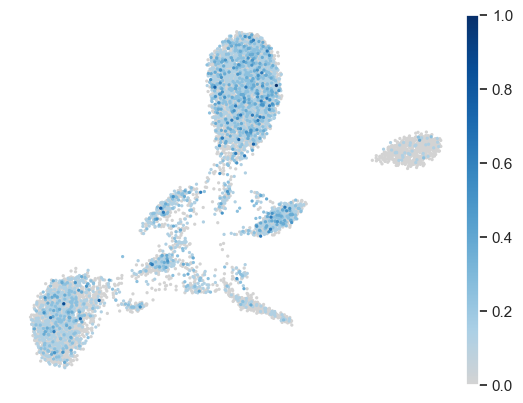

In [21]:
scATAcat.plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name='ZNF488', 
                           activity_matrix=atac_activity_matrix,
                           out_path=figures_dir+"/ZNF488_gene_act_Olig_marker.pdf",
                           cmap= None)
plt.show()

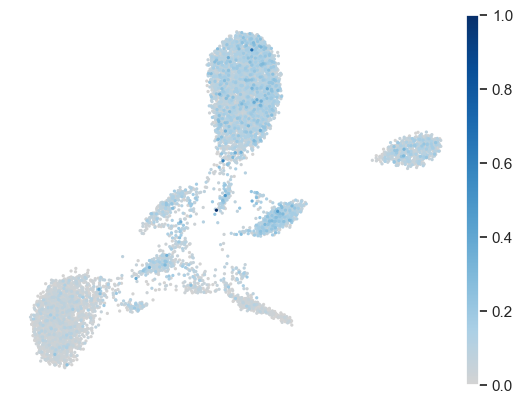

In [22]:
scATAcat.plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name='MBP', 
                           activity_matrix=atac_activity_matrix,
                           out_path=figures_dir+"/MBP_gene_act_Olig_marker.pdf",
                           cmap= None)
plt.show()

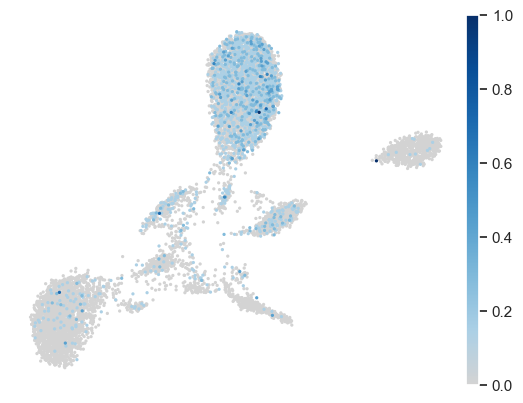

In [23]:
scATAcat.plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name='MOG', 
                           activity_matrix=atac_activity_matrix,
                           out_path=figures_dir+"/MOG_gene_act_Olig_marker.pdf",
                           cmap= None)
plt.show()

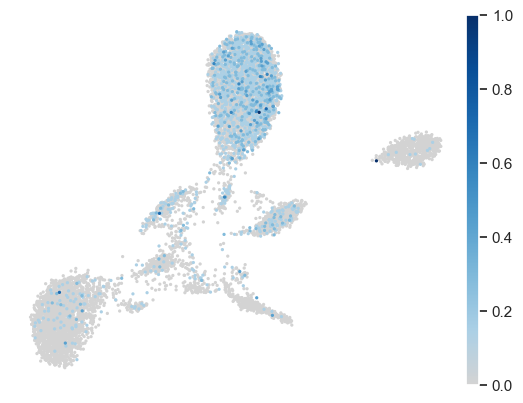

In [24]:
scATAcat.plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name='MOG', 
                           activity_matrix=atac_activity_matrix,
                           out_path=figures_dir+"/MOG_gene_act_Olig_marker.pdf",
                           cmap= None)
plt.show()

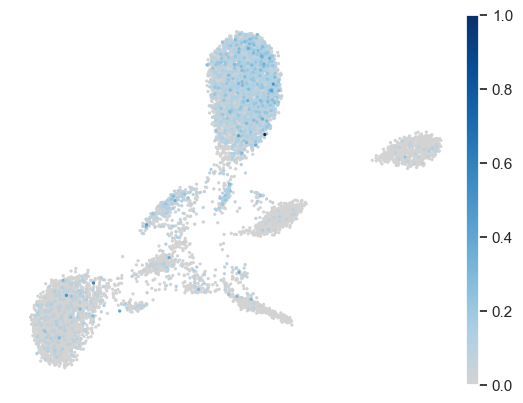

In [25]:
scATAcat.plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name='MAG', 
                           activity_matrix=atac_activity_matrix,
                           out_path=figures_dir+"/MAG_gene_act_Olig_marker.pdf",
                           cmap= None)
plt.show()

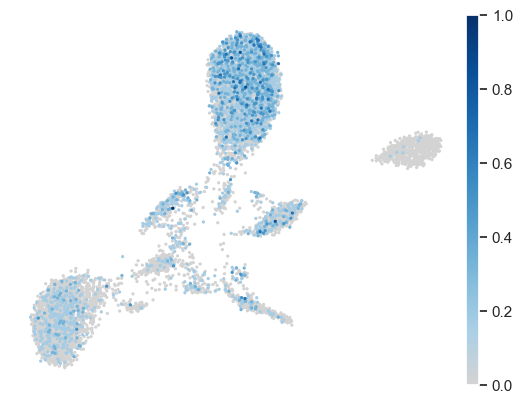

In [26]:
scATAcat.plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name='PLP1', 
                           activity_matrix=atac_activity_matrix,
                           out_path=figures_dir+"/PLP1_gene_act_Olig_marker.pdf",
                           cmap= None)
plt.show()

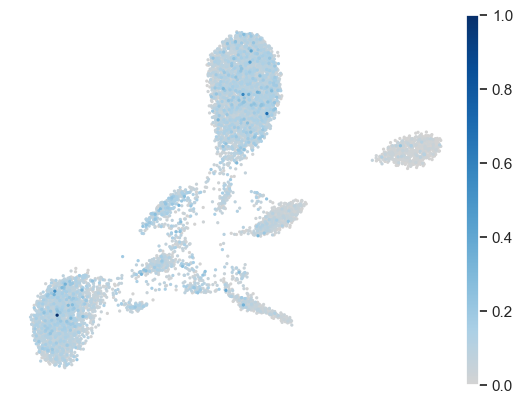

In [27]:
scATAcat.plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name='CLDN11', 
                           activity_matrix=atac_activity_matrix,
                           out_path=figures_dir+"/CLDN11_gene_act_Olig_marker.pdf",
                           cmap= None)
plt.show()

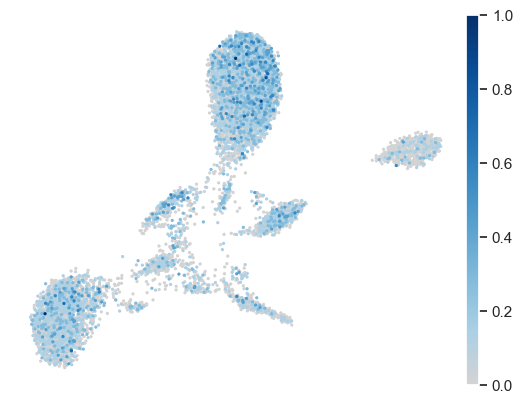

In [28]:
scATAcat.plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name='CNP', 
                           activity_matrix=atac_activity_matrix,
                           out_path=figures_dir+"/CNP_gene_act_Olig_marker.pdf",
                           cmap= None)
plt.show()

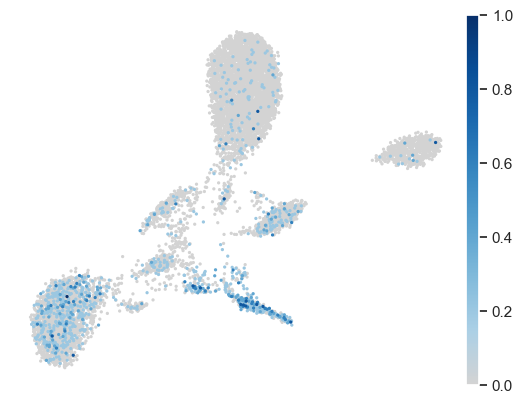

In [29]:
scATAcat.plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name='AQP4', 
                           activity_matrix=atac_activity_matrix,
                           out_path=figures_dir+"/AQP4_gene_act_Astrocyte_marker.pdf",
                           cmap= None)
plt.show()

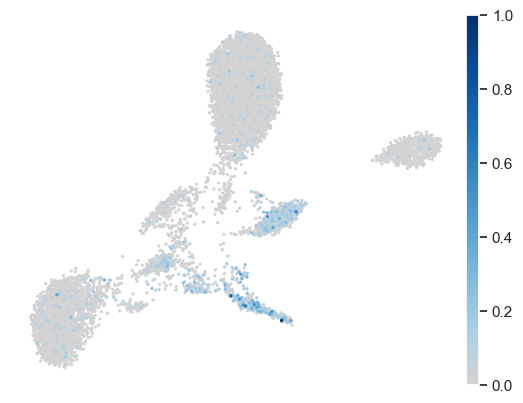

In [30]:
scATAcat.plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name='GFAP', 
                           activity_matrix=atac_activity_matrix,
                           out_path=figures_dir+"/GFAP_gene_act_Astrocyte_marker.pdf",
                           cmap= None)
plt.show()

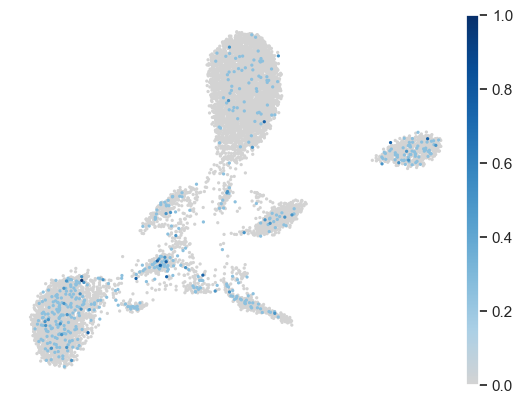

In [31]:
scATAcat.plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name='CD40', 
                           activity_matrix=atac_activity_matrix,
                           out_path=figures_dir+"/CD40_gene_act_Astrocyte_marker.pdf",
                           cmap= None)
plt.show()

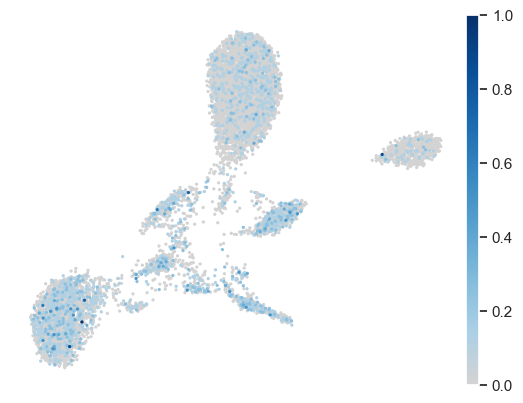

In [32]:
scATAcat.plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name='ALDOC', 
                           activity_matrix=atac_activity_matrix,
                           out_path=figures_dir+"/ALDOC_gene_act_Astrocyte_marker.pdf",
                           cmap= None)
plt.show()

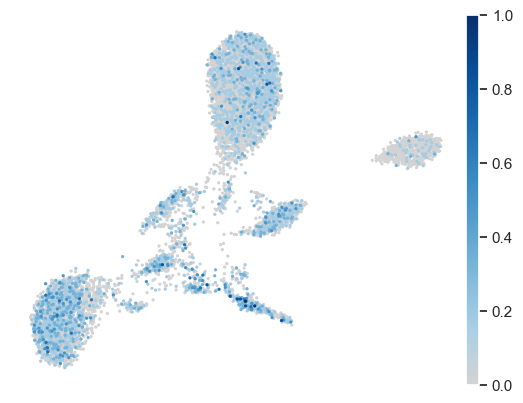

In [33]:
scATAcat.plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name='SOX9', 
                           activity_matrix=atac_activity_matrix,
                           out_path=figures_dir+"/SOX9_gene_act_Astrocyte_marker.pdf",
                           cmap= None)
plt.show()

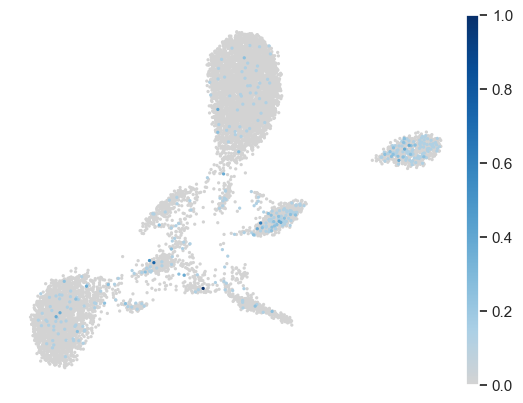

In [34]:
scATAcat.plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name='TMEM119', 
                           activity_matrix=atac_activity_matrix,
                           out_path=figures_dir+"/TMEM119_gene_act_Microglial_marker.pdf",
                           cmap= None)
plt.show()

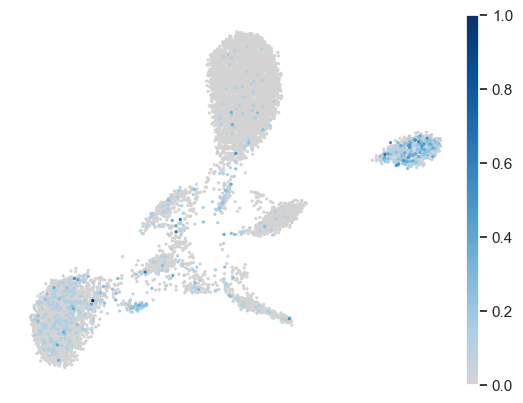

In [35]:
scATAcat.plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name='CX3CR1', 
                           activity_matrix=atac_activity_matrix,
                           out_path=figures_dir+"/CX3CR1_gene_act_Microglial_marker.pdf",
                           cmap= None)
plt.show()

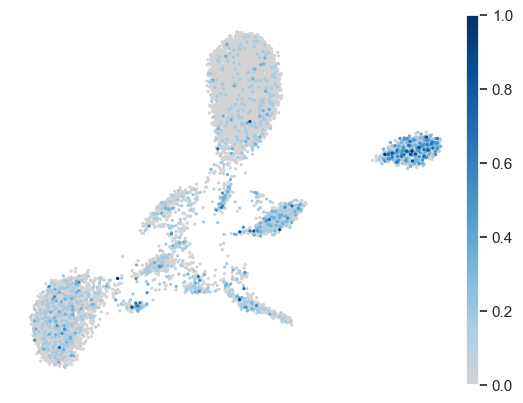

In [36]:
scATAcat.plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name='P2RY12', 
                           activity_matrix=atac_activity_matrix,
                           out_path=figures_dir+"/P2RY12_gene_act_Microglial_marker.pdf",
                           cmap= None)
plt.show()

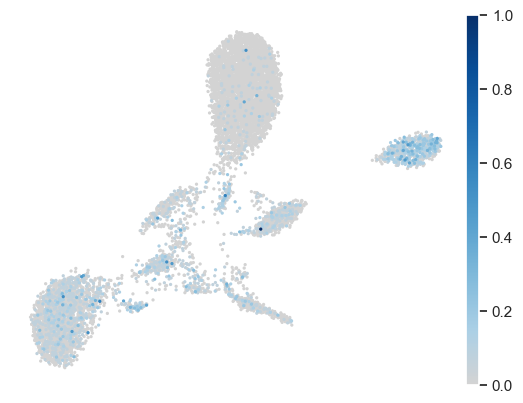

In [37]:
scATAcat.plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name='CSF1R', 
                           activity_matrix=atac_activity_matrix,
                           out_path=figures_dir+"/CSF1R_gene_act_Microglial_marker.pdf",
                           cmap= None)
plt.show()

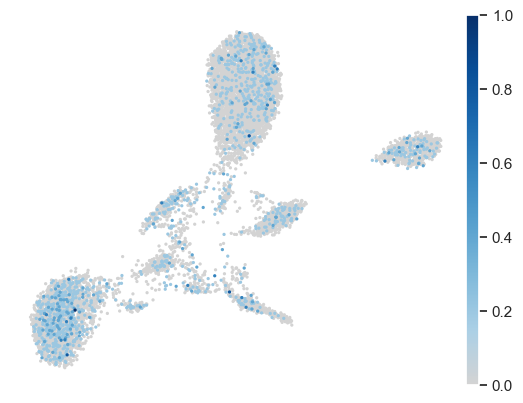

In [38]:
scATAcat.plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name='SLC17A7', 
                           activity_matrix=atac_activity_matrix,
                           out_path=figures_dir+"/SLC17A7_gene_act_Glu_marker.pdf",
                           cmap= None)
plt.show()

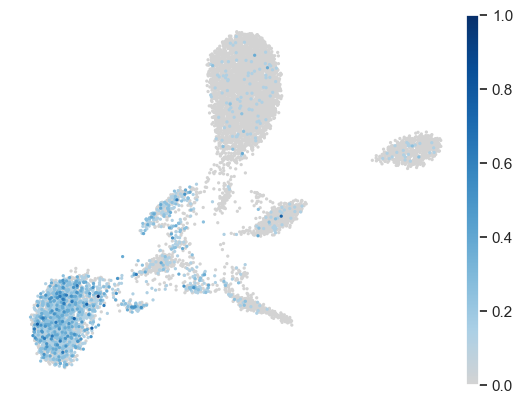

In [39]:
scATAcat.plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name='NRGN', 
                           activity_matrix=atac_activity_matrix,
                           out_path=figures_dir+"/NRGN_gene_act_Glu_marker.pdf",
                           cmap= None)
plt.show()

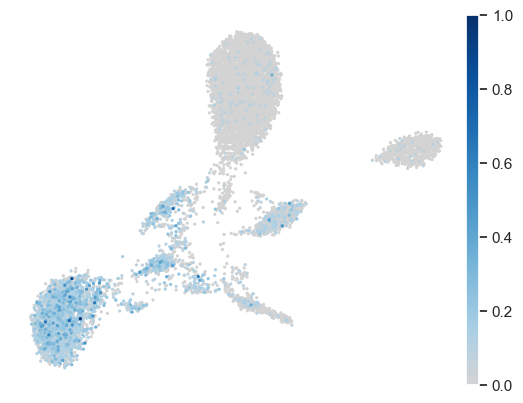

In [40]:
scATAcat.plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name='ATP1A3', 
                           activity_matrix=atac_activity_matrix,
                           out_path=figures_dir+"/ATP1A3_gene_act_Glu_marker.pdf",
                           cmap= None)
plt.show()

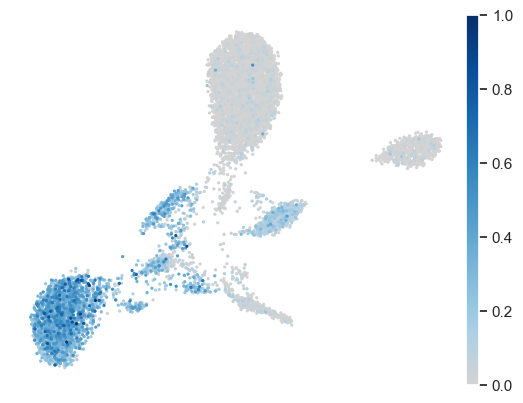

In [41]:
scATAcat.plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name='BCL11B', 
                           activity_matrix=atac_activity_matrix,
                           out_path=figures_dir+"/BCL11B_gene_act_Glu_marker.pdf",
                           cmap= None)
plt.show()

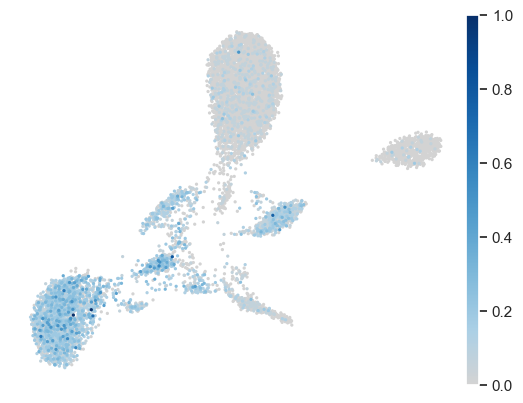

In [42]:
scATAcat.plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name='GAD1', 
                           activity_matrix=atac_activity_matrix,
                           out_path=figures_dir+"/GAD1_gene_act_GABA_marker.pdf",
                           cmap= None)
plt.show()

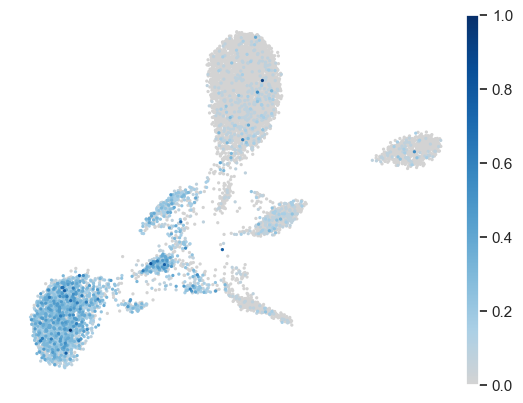

In [43]:
scATAcat.plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name='GAD2', 
                           activity_matrix=atac_activity_matrix,
                           out_path=figures_dir+"/GAD2_gene_act_GABA_marker.pdf",
                           cmap= None)
plt.show()

In [44]:
scATAcat.plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name='VGAD', 
                           activity_matrix=atac_activity_matrix,
                           out_path=figures_dir+"/VGAD_gene_act_GABA_marker.pdf",
                           cmap= None)
plt.show()

this gene is not included in the gene activity matrix


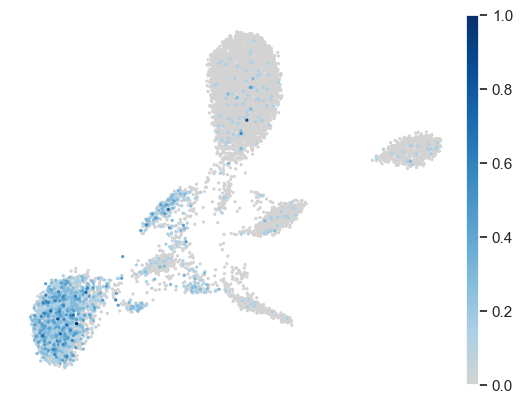

In [45]:
scATAcat.plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name='CALB1', 
                           activity_matrix=atac_activity_matrix,
                           out_path=figures_dir+"/CALB1_gene_act_GABA_marker.pdf",
                           cmap= None)
plt.show()

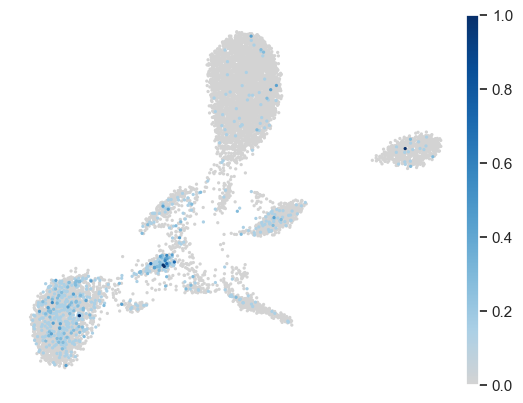

In [46]:
scATAcat.plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name='CALB2', 
                           activity_matrix=atac_activity_matrix,
                           out_path=figures_dir+"/CALB2_gene_act_GABA_marker.pdf",
                           cmap= None)
plt.show()

In [47]:
scATAcat.plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name='CCk', 
                           activity_matrix=atac_activity_matrix,
                           out_path=figures_dir+"/CCK_gene_act_GABA_marker.pdf",
                           cmap= None)
plt.show()

this gene is not included in the gene activity matrix


### UMAP embedding colored by ground-truth cell-type identities

In [48]:
paper_metadata_common.head()

,cell_IDs,ground_truth_annotations,ground_truth_annotations_simplified
TTACGTTGTAGTATCC-1,TTACGTTGTAGTATCC-1,Oligodendrocytes,OLIG
TCGCAGGTCTACTGCC-1,TCGCAGGTCTACTGCC-1,InhibitoryNeurons,GABA
ACAGAAACACGATTAC-1,ACAGAAACACGATTAC-1,InhibitoryNeurons,GABA
CTTCCAGCACAGTTCA-1,CTTCCAGCACAGTTCA-1,Astrocytes,MGAS
GAGATTCTCGTTGTAG-1,GAGATTCTCGTTGTAG-1,Microglia,MGAS


In [49]:
test_df = sc_commonDiffFeatures_adata.obs

In [50]:
sc_commonDiffFeatures_adata.obs.index.name =None
sc_commonDiffFeatures_adata.obs = pd.merge(test_df, paper_metadata_common, on="cell_IDs")

In [51]:
sc_commonDiffFeatures_adata.obs.columns

Index(['cell_IDs', 'leiden_1.0', 'num_feature_per_cell_', 'ZNF488', 'MBP',
       'MOG', 'MAG', 'PLP1', 'CLDN11', 'CNP', 'AQP4', 'GFAP', 'CD40', 'ALDOC',
       'SOX9', 'TMEM119', 'CX3CR1', 'P2RY12', 'CSF1R', 'SLC17A7', 'NRGN',
       'ATP1A3', 'BCL11B', 'GAD1', 'GAD2', 'CALB1', 'CALB2',
       'ground_truth_annotations', 'ground_truth_annotations_simplified'],
      dtype='object')

In [90]:
sc_commonDiffFeatures_adata.uns["ground_truth_annotations_simplified_colors"] =['#38184C',  "#82018F","#7ED9B7", "#BDB0D9", "coral","#008F8C",'#F5206A',"tab:red","#D46A00",'#C2EA8C',"#7ED9B7",'goldenrod']

In [55]:
sc_commonDiffFeatures_adata.uns.keys()

odict_keys(['pca', 'neighbors', 'umap', 'leiden', 'leiden_1.0_colors', 'ground_truth_annotations_simplified_colors'])

In [91]:
with plt.rc_context():
    
    sc.pl.umap(sc_commonDiffFeatures_adata, color='ground_truth_annotations_simplified', show=False,size=22 , add_outline=False, frameon=False, title="")
    plt.savefig(figures_dir + "/UMAP_colored_ground_truth_matchingcolor.pdf", bbox_inches="tight")

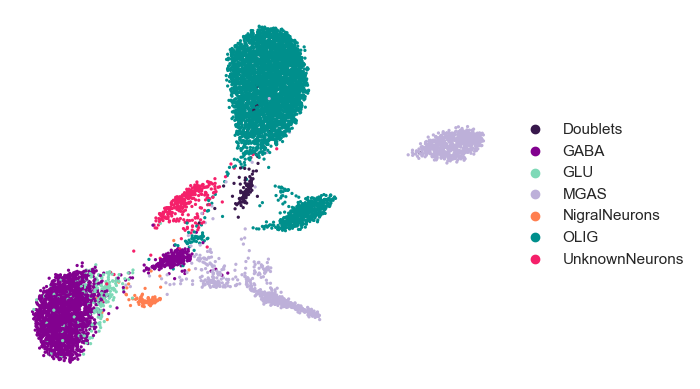

In [92]:
plt.show()

In [73]:
['#38184C',  "#82018F","#CA1ED4", "#BDB0D9", "#275974","#008F8C",'#D46A00',"tab:red","coral",'#C2EA8C',"#7ED9B7",'goldenrod']



['#38184C',
 '#82018F',
 '#CA1ED4',
 '#BDB0D9',
 '#275974',
 '#008F8C',
 '#D46A00',
 'tab:red',
 'coral',
 '#C2EA8C',
 '#7ED9B7',
 'goldenrod']

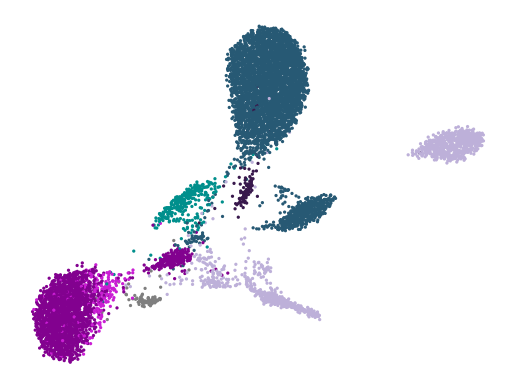

In [72]:
sc.pl.umap(sc_commonDiffFeatures_adata, color='ground_truth_annotations_simplified', show=True,size=22 , add_outline=False, frameon=False, title="",legend_loc="lower center")